In [1]:
import os
import glob

sacred_dir = "sacred_cluster"
parent_dir = os.path.dirname(os.getcwd())
info_json_files = glob.glob(os.path.join(parent_dir,sacred_dir, "**/*info.json"), recursive=True)
print(len(info_json_files))

215


In [23]:
import json
method = "qvmix"
env1 = "uc"
env2 = "10"
dict_={}
for i in info_json_files:
    exp_name = os.path.basename(os.path.dirname(i))
    exp_name_split=exp_name.split("_")
    if not(exp_name_split[0] == method and exp_name_split[4] == env1 and exp_name_split[5] == env2):
        continue
    try:
        with open(i, "r") as file:
            infos = json.load(file)

            dict_[exp_name]={}
            dict_[exp_name]["test_return_mean"] = [i["value"] for i in infos["test_return_mean"]]
            dict_[exp_name]["test_return_mean_T"] = infos["test_return_mean_T"]
    except Exception as e:
        print(i, e)


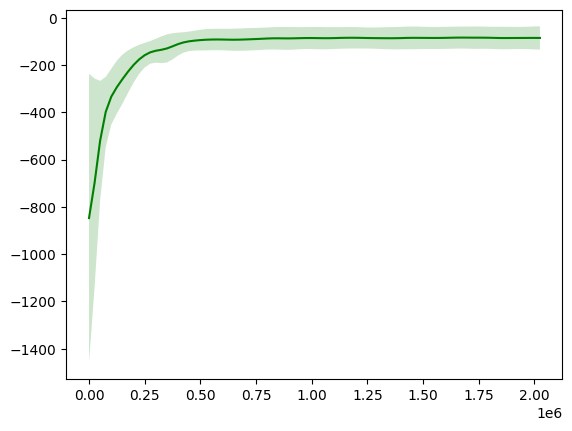

In [25]:
from scipy.ndimage import gaussian_filter1d
import numpy as np
from matplotlib import pyplot as plt
list_1 = []
for k, v in dict_.items():
    list_1.append(v["test_return_mean"])

np_ = np.array(list_1)
mean = np.mean(np_, axis=0)
std = np.std(np_, axis=0)
fig = plt.figure()
ax = fig.gca()
time_steps = [i*25000 for i in range(mean.shape[0])]
sigma_std=1.5
ax.plot(time_steps, gaussian_filter1d(mean, sigma=1.5), label=method, color="green")
ax.fill_between(time_steps, gaussian_filter1d(mean+std,sigma=sigma_std), gaussian_filter1d(mean-std,sigma=sigma_std), facecolor="green", alpha=0.2)